# Coding Logistic Regression from scratch
One of the simplest trick to code and understand logistic regression is "Perceptron Trick". This specific implementation is not used by Scikit-learn as it has some flaws. we will start by coding perceptron trick and gradually imporove it so that it matches Scikit-learn implementation
- Logistic regression assumes that the data is linearly separable
- Data should be normalized

## Perceptron Trick:
In perceptron trick the equation of line used is ax+by+c. The goal is to find the values of a,b,c such that the line separates the data. Perceptron trick says the start with random values of a.b.c randomly select n points ask them if they are correctly classified or not. If the point is correctly classified then don't change the values of a,b,c otherwise change the values of a,b,c such that the point is correctly classified. This process is repeated until all the points are correctly classified. The weights are updated as follows:
- W(new) = W(old) + alpha * (y - y_pred) * x

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [187]:
X,y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_clusters_per_class=1, n_classes=2, class_sep=3, random_state=42)

<Axes: >

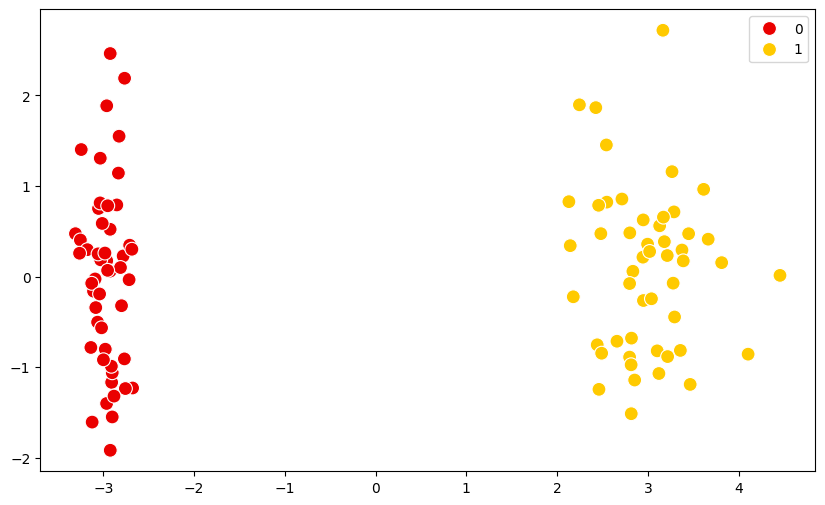

In [188]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette="hot", s=100)

# Perceptron Trick implementation

In [189]:
# def sigmoid(z):
#     return 1/(1 + np.exp(-z))

# class perceptron:
#     def __init__(self, lr, epochs):
#         self.coef_ = None
#         self.intercept_ = None
#         self.lr = lr
#         self.epochs = epochs
#         self.lr = 0.1
#     def fit(self, X, y):
#         X = np.insert(X,0,1,axis=1)
#         self.coef_ = np.ones(X.shape[1])
#         for i in range (self.epochs):
#             j = np.random.randint(X.shape[0])
#             print(X[j].shape)
#             print(self.coef_.shape)
#             z = np.dot(X[j], self.coef_)
#             y_hat = sigmoid(z)
#             self.coef_ = self.coef_ + self.lr*(y[j] - y_hat) * X[j]
#             self.intercept_ = self.coef_[0]
#             self.coef_ = self.coef_[1:]
#     def predict(self,X_test):
#         pred = sigmoid(np.dot(self.coef_, X_test) + self.intercept_)
#         return pred


In [190]:
# our_perceptron = perceptron(lr=0.1, epochs=1000)
# our_perceptron.fit(X,y)

In [191]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

class Perceptron:
    def __init__(self, lr=0.1, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self, X, y):
        # Add bias term (intercept) to X
        X = np.insert(X, 0, 1, axis=1)
        # Initialize weights (including bias)
        self.coef_ = np.ones(X.shape[1])
        
        for i in range(self.epochs):
            j = np.random.randint(X.shape[0])
            # Calculate prediction
            z = np.dot(X[j], self.coef_)
            y_hat = sigmoid(z)
            # Update all weights (including bias)
            self.coef_ += self.lr * (y[j] - y_hat) * X[j]
        
        # Separate intercept and coefficients
        self.intercept_ = self.coef_[0]
        self.coef_ = self.coef_[1:]
        
    def predict_proba(self, X):
        z = np.dot(X, self.coef_) + self.intercept_
        return sigmoid(z)
    
    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

In [192]:
our_perceptron = Perceptron(lr=0.1, epochs=1000)
our_perceptron.fit(X,y)

In [193]:
print(our_perceptron.coef_)
print(our_perceptron.intercept_)

[2.47101326 0.56976379]
0.6463167327000144


In [194]:
sklearn_logistic = LogisticRegression()
sklearn_logistic.fit(X,y)
print(sklearn_logistic.intercept_)
print(sklearn_logistic.coef_)

[0.10895717]
[[1.75896419 0.04124153]]


In [195]:
sklearn_logistic.coef_[0][1]

np.float64(0.041241526992483776)

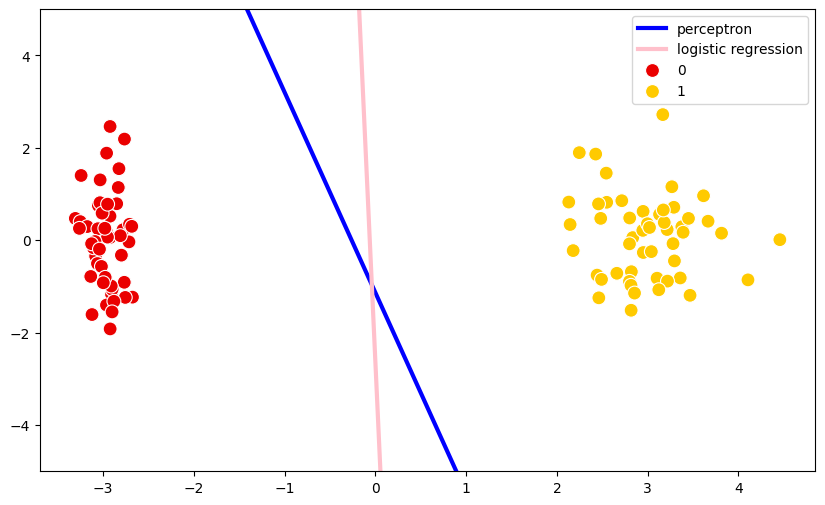

In [200]:
m = -(our_perceptron.coef_[0]/our_perceptron.coef_[1])
b = -(our_perceptron.intercept_/our_perceptron.coef_[1])
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

m1 = -(sklearn_logistic.coef_[0][0]/sklearn_logistic.coef_[0][1])
b1 = -(sklearn_logistic.intercept_/sklearn_logistic.coef_[0][1])
x_input1 = np.linspace(-3,3,100)
y_input1 = m1*x_input1 + b1


plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color='blue', linewidth=3, label='perceptron')
plt.plot(x_input1, y_input1, color='pink', linewidth=3, label='logistic regression')
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette="hot", s=100)
plt.ylim(-5,5)
plt.legend()